In [1]:
cd((@__DIR__) * raw"\..")
include("../table_reader.jl")

extract_series (generic function with 1 method)

In [2]:
series=extract_series("TX_STAID000031.txt",plot=false)
years=unique(Dates.year.(series.DATE))

#Imputing missing values
# include("utils/Missing_values.jl")
# ImputeMissingValues!(series[!,2],series.DATE)
# N=length(series[!,2])

107-element Vector{Int64}:
 1897
 1898
 1899
 1900
 1901
 1902
 1903
 1904
 1905
 1906
    ⋮
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
 2003

## I. Series filtered by removing a trigonometric periodicity

In [3]:
include("../utils/periodicity.jl")
trigo_function=fitted_periodicity_fonc(series[!,2],series.DATE,OrderTrig=2)
periodicity=trigo_function.(series.DATE)
x=series[!,2]-periodicity

38758-element Vector{Float64}:
  0.16990424312910157
  0.887678833455535
  1.6029762308920539
 -1.1841799047372863
  2.626234851639799
  0.23424564970676798
  4.13987832289992
  3.7431593473804234
  3.344115800888419
  4.44277532153073
  ⋮
  2.7279480284712623
  0.627920107344778
 -0.8728880934175507
 -1.7744729833498916
  0.1231689150622195
  2.920040996818752
  3.316146605235037
  1.8114890631176443
  2.406071704239139

## Segmenting the dataset by month

In [4]:
include("../utils/Separation.jl")
Monthly_date=MonthlySeparateDates(series.DATE)
Monthly_temp=MonthlySeparateX(x,series.DATE)

12-element Vector{Vector{AbstractVector}}:
 [[0.16990424312910157, 0.887678833455535, 1.6029762308920539, -1.1841799047372863, 2.626234851639799, 0.23424564970676798, 4.13987832289992, 3.7431593473804234, 3.344115800888419, 4.44277532153073  …  -2.5418252313022904, -9.070330272658365, -11.600709275688784, -7.832931032441265, -1.2669644020527766, -0.8027783455378845, -6.64034195979186, -6.679624510768978, -4.320595465797927, -5.863224524997108], [-0.13009575687089736, 0.9876788334555346, 4.302976230892053, 2.715820095262714, 2.526234851639799, 0.8342456497067676, 1.03987832289992, 1.4431593473804245, 1.0441158008884202, 1.7427753215307291  …  2.4581747686977096, 4.529669727341636, 0.5992907243112153, 3.867068967558735, 0.833035597947223, 0.9972216544621144, 3.0596580402081415, 0.9203754892310219, -1.120595465797928, 4.136775475002892], [-1.6300957568708974, 3.7876788334555336, -2.2970237691079465, 0.41582009526271513, 4.326234851639798, 4.034245649706769, 2.7398783228999193, 2.943159347

## Autocorrelations

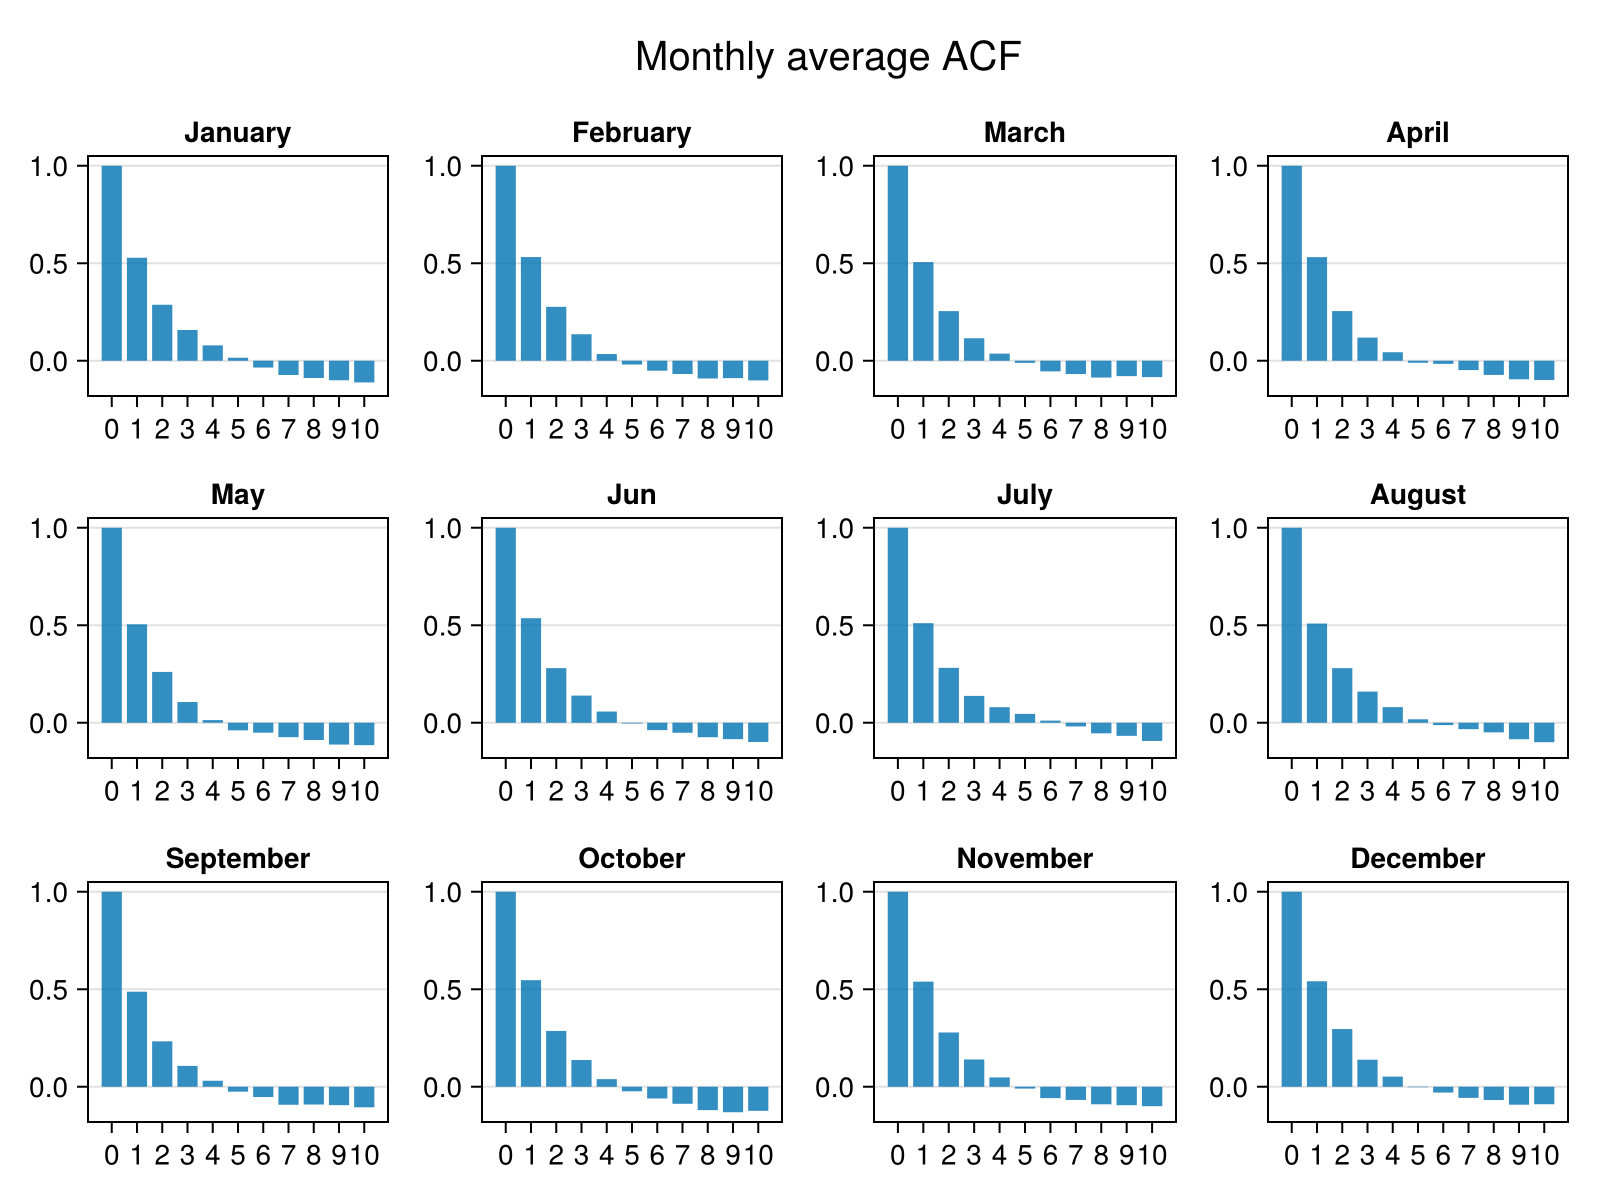

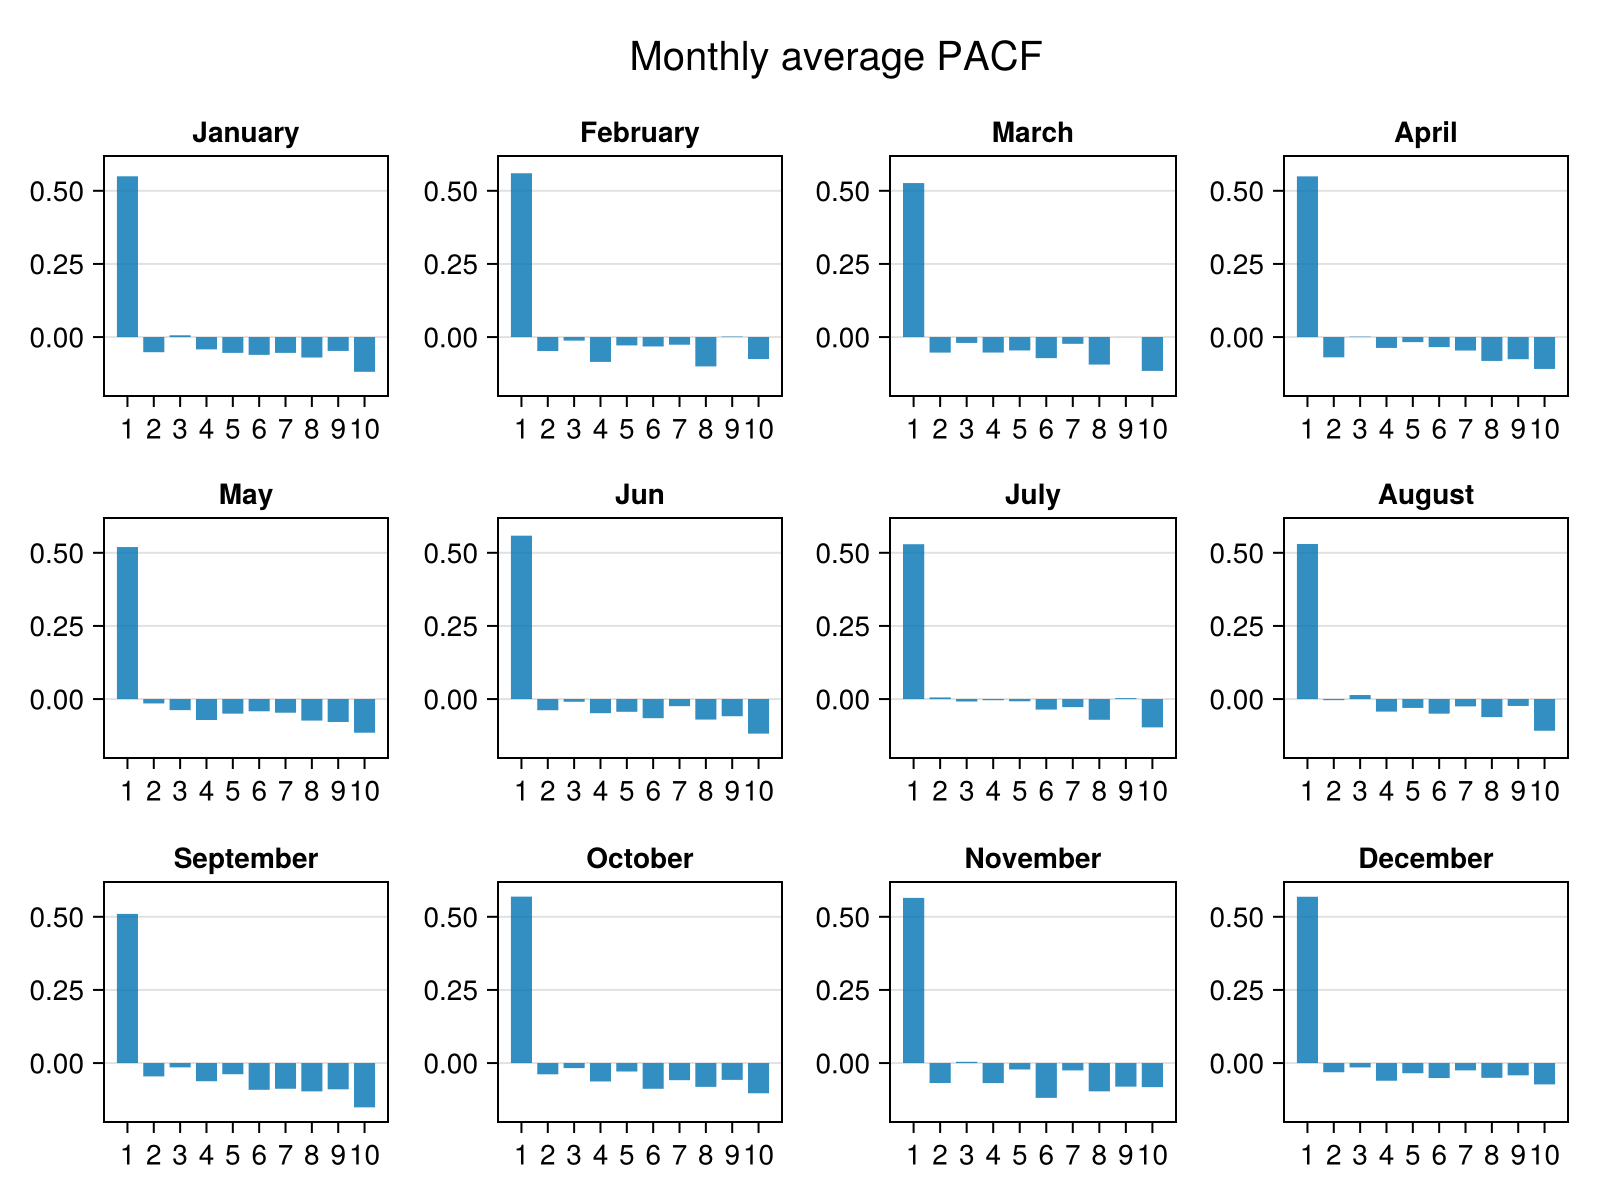

CairoMakie.Screen{IMAGE}


In [5]:
include("../utils/ACF_PACF.jl")
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

For each month, it still looks like an AR(1) model

# Estimation AR(1)

## Estimation

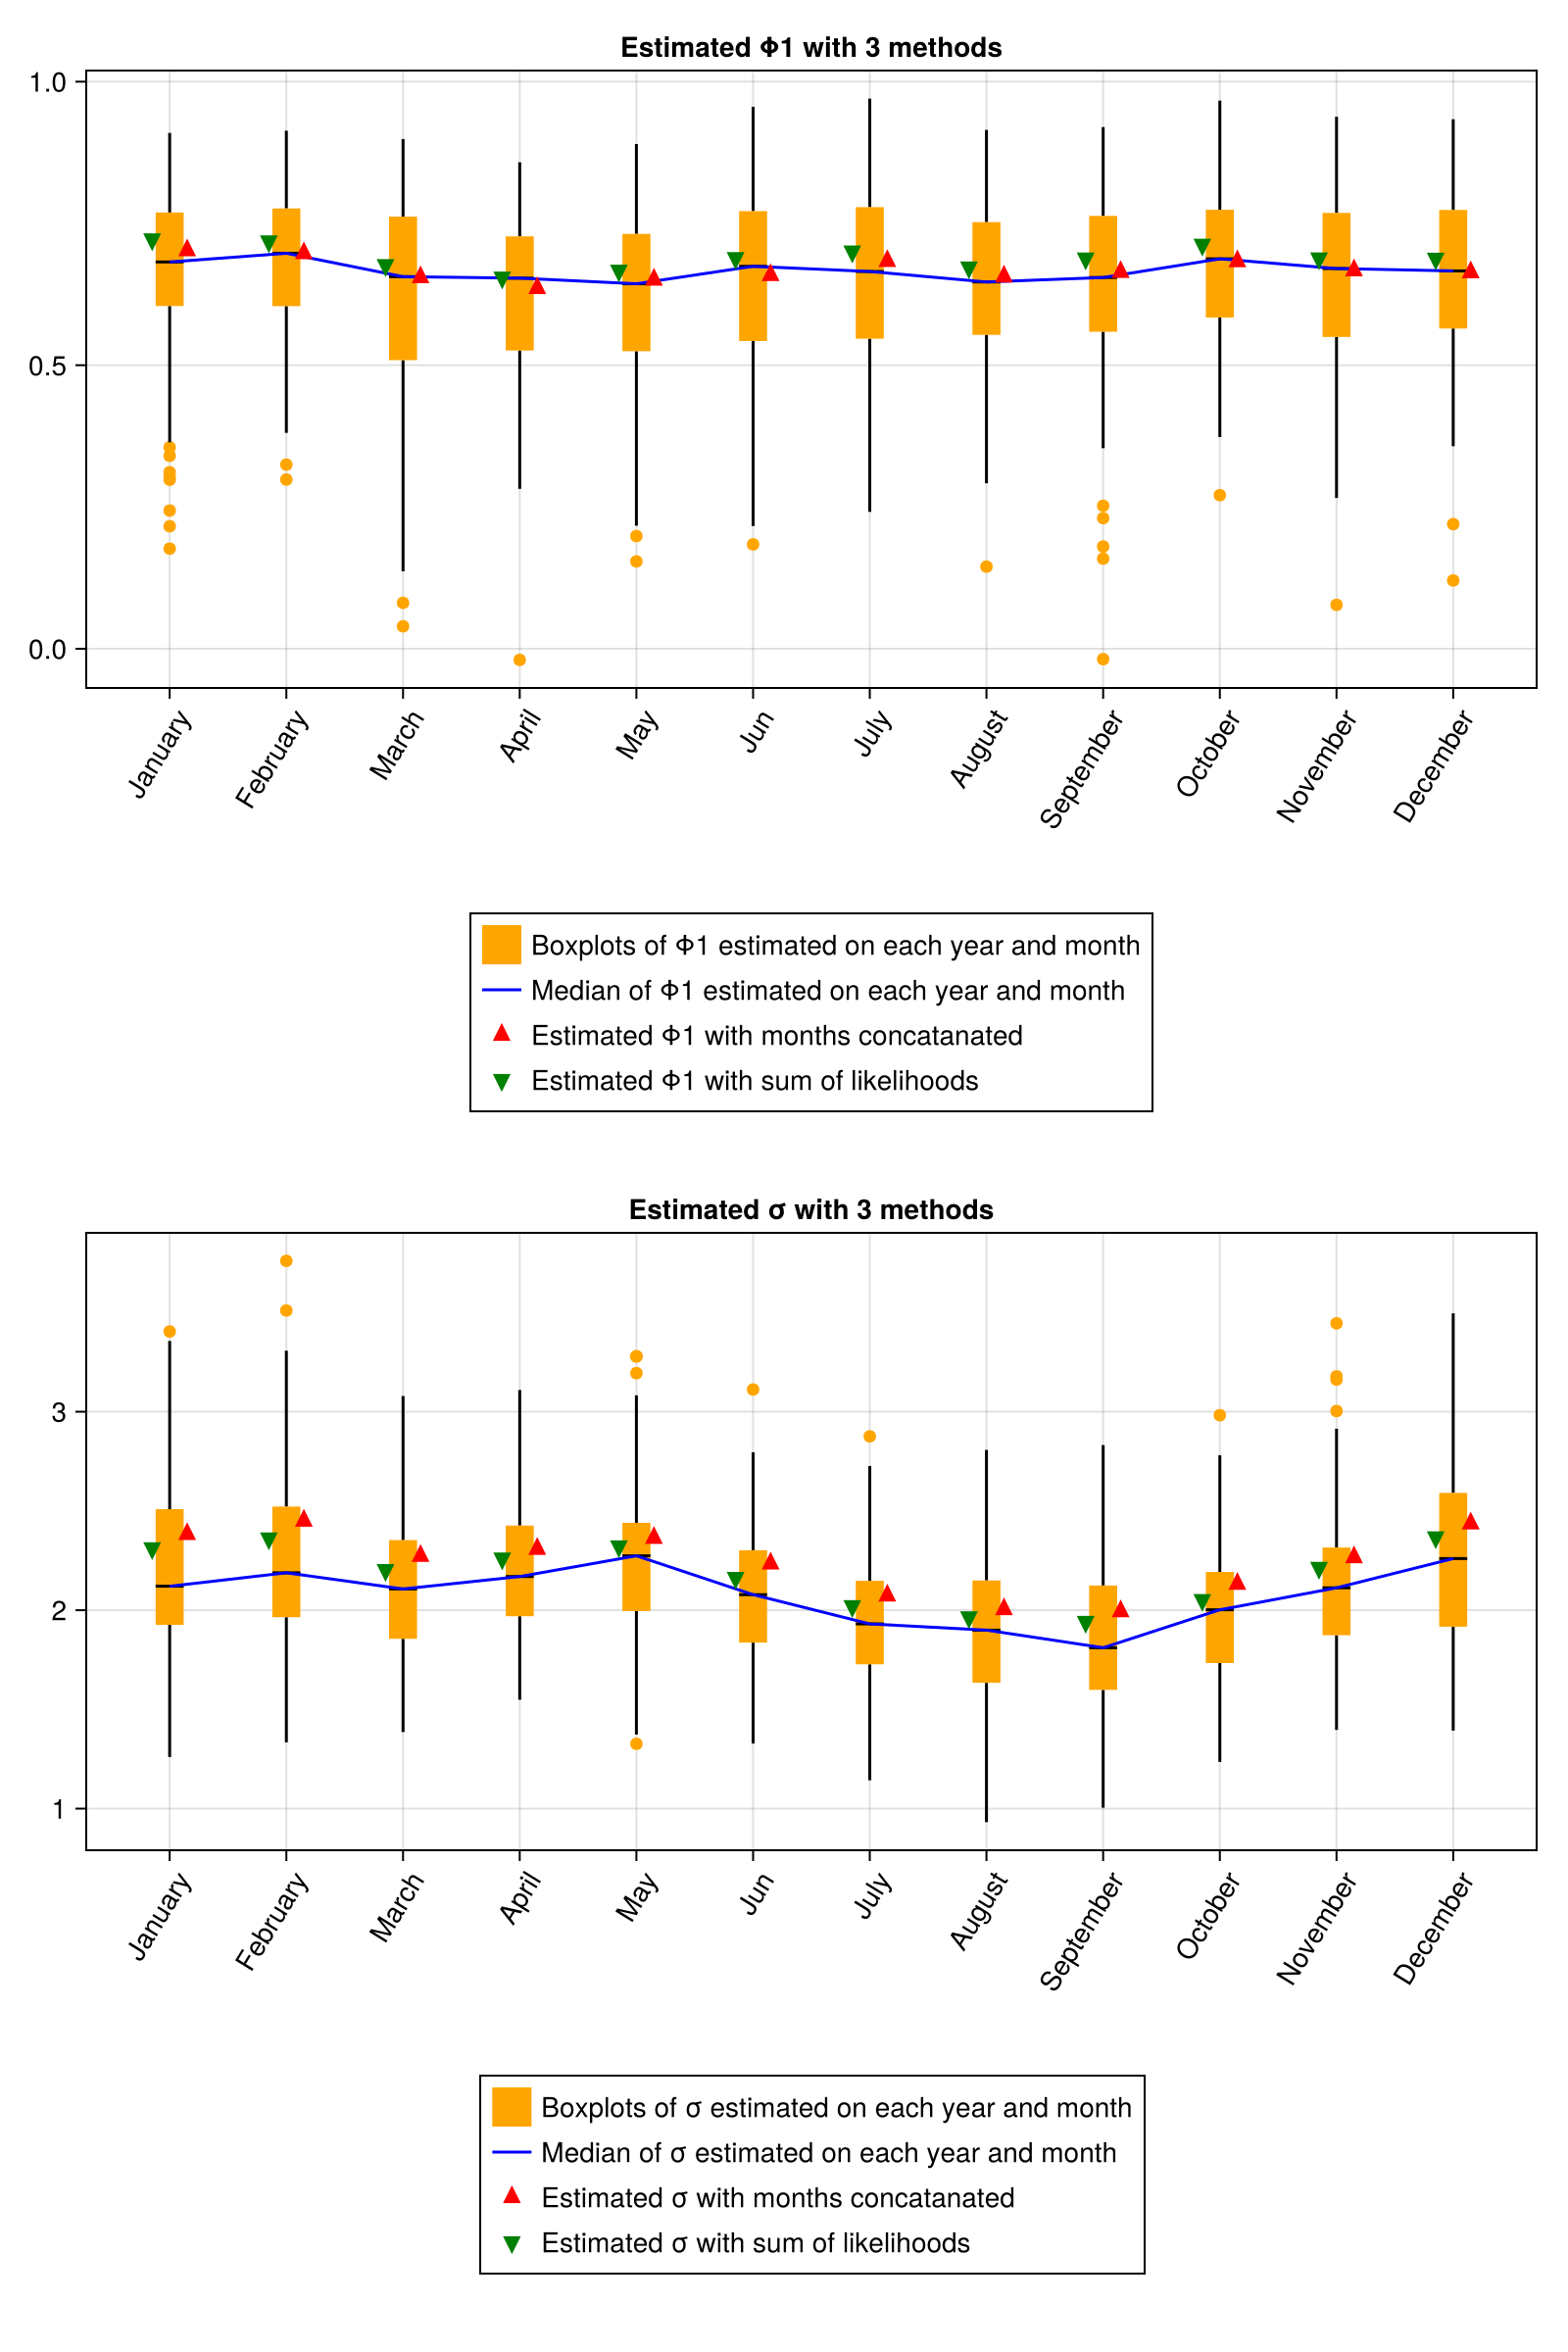

CairoMakie.Screen{IMAGE}


In [11]:
include(raw"..\utils\Estimation.jl")
Params, figure= AllEstimation(Monthly_temp, lineplot=true)
display(figure)

## Simulation

### With estimation on each month

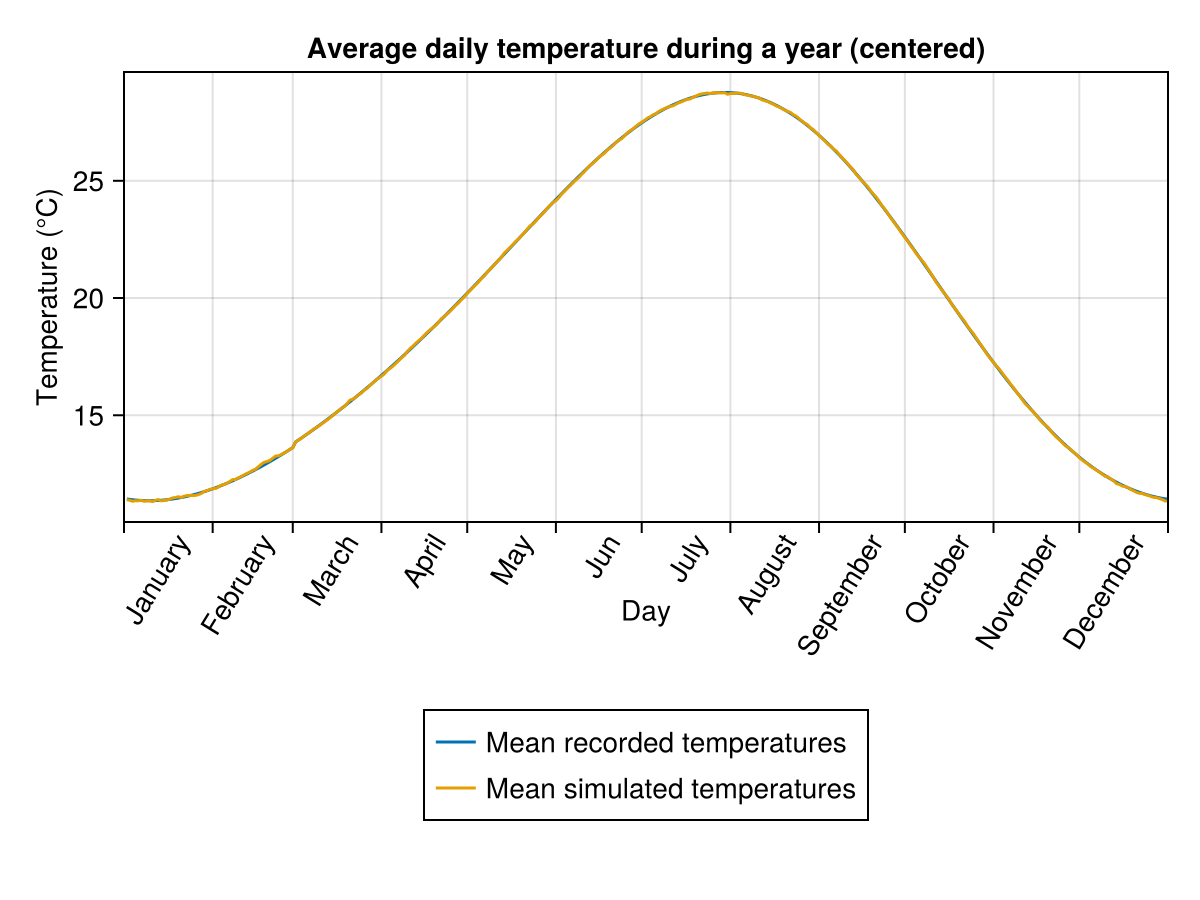

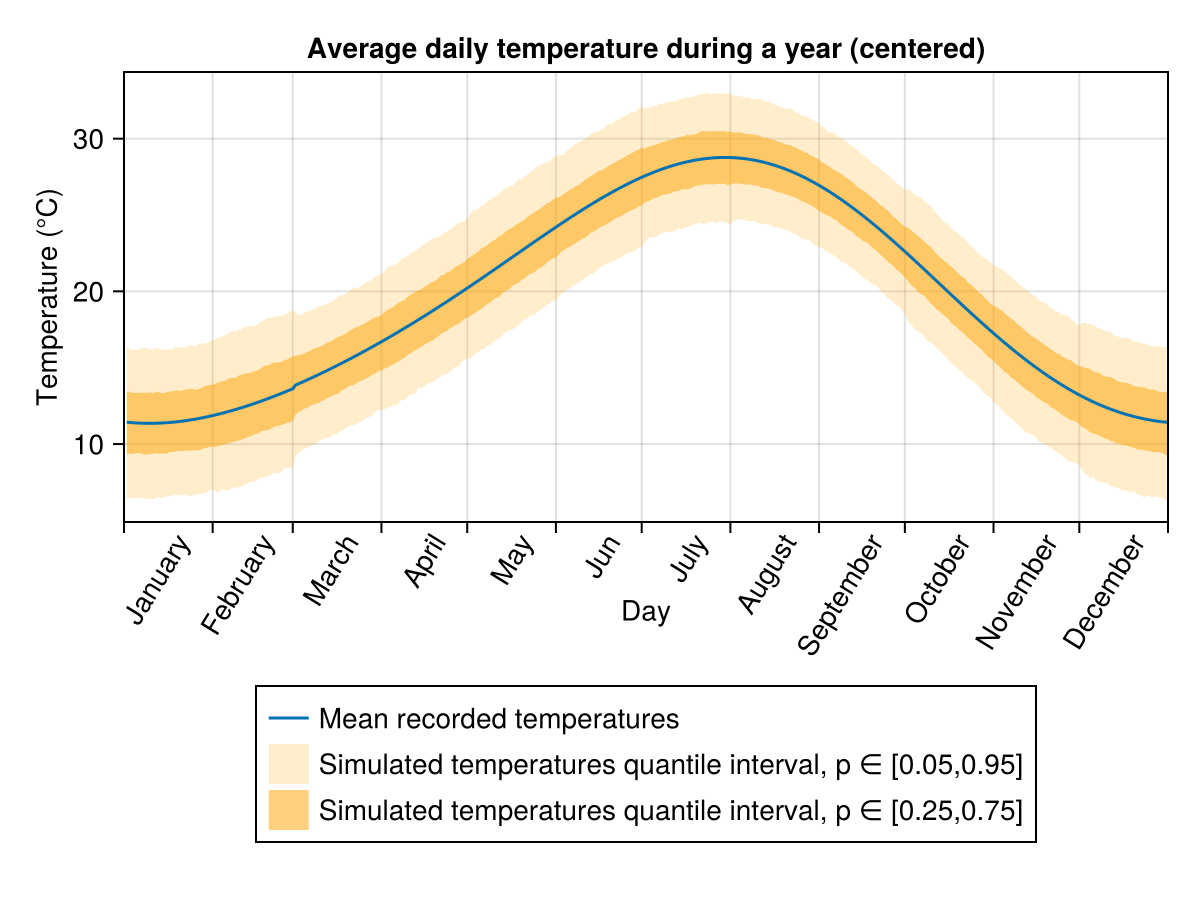

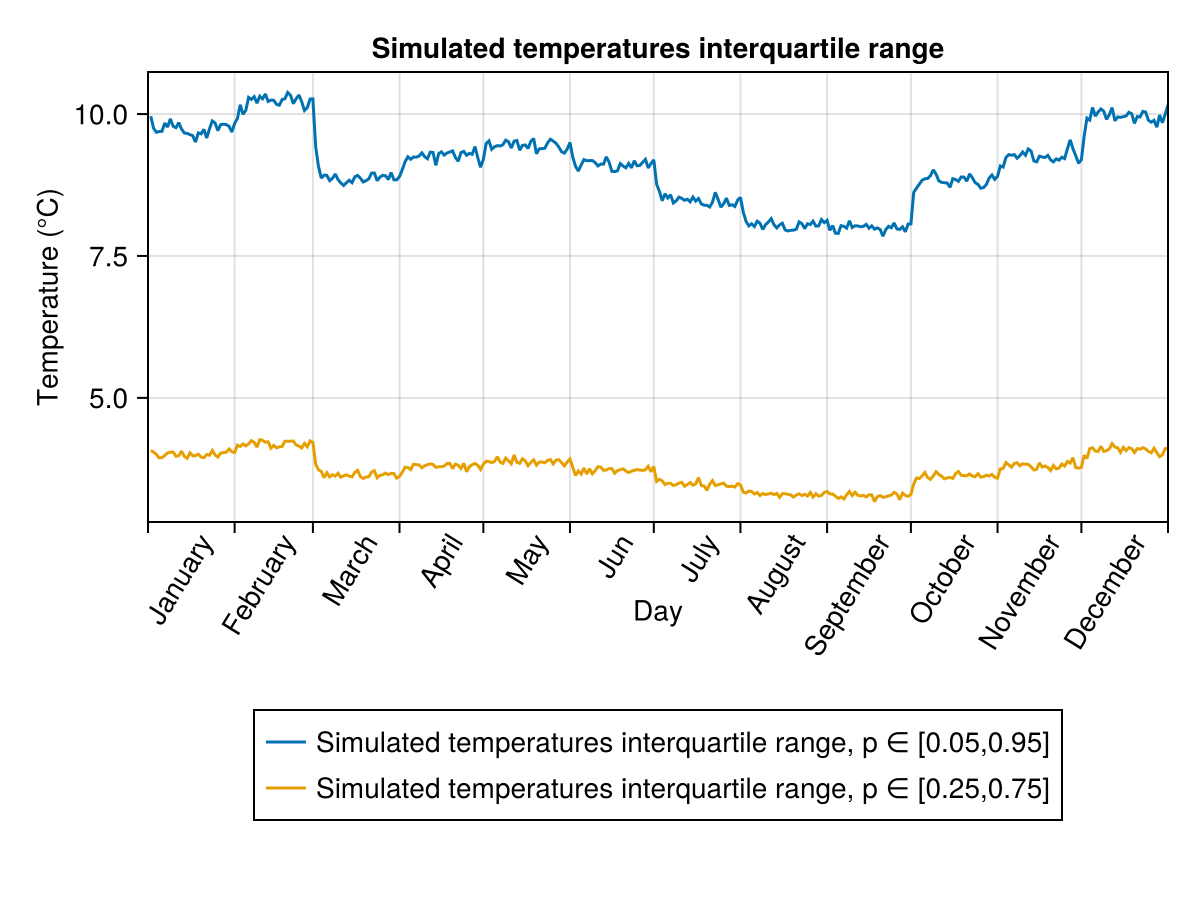

CairoMakie.Screen{IMAGE}


In [7]:
include("../utils/Simulation.jl")
include("../utils/Plotting.jl")
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"mean")
# Monthly_temp[1][1][1]::AbstractVector
# Φ_month_mean::AbstractVector
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

We see clearly that interquartile range is shorter during summer and larger during winter.

### With months concatanation

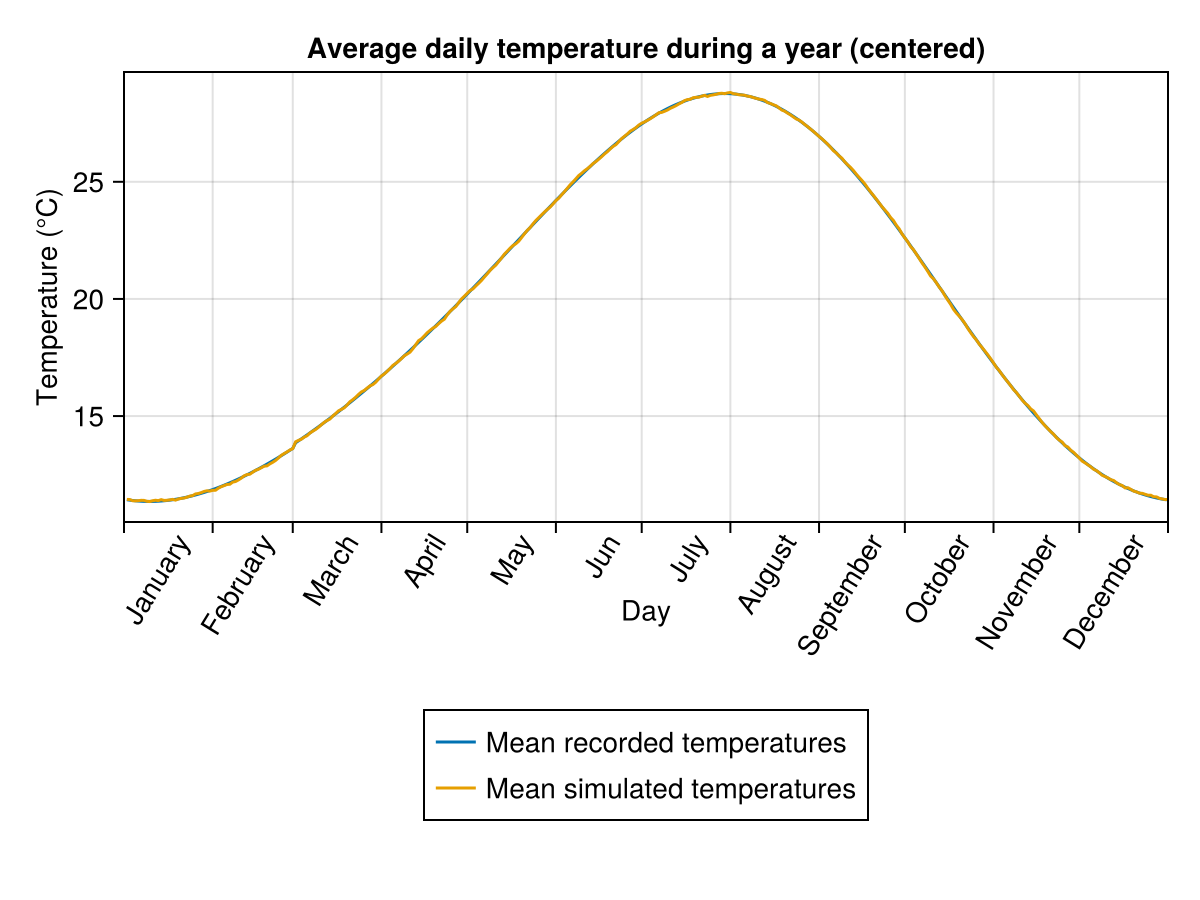

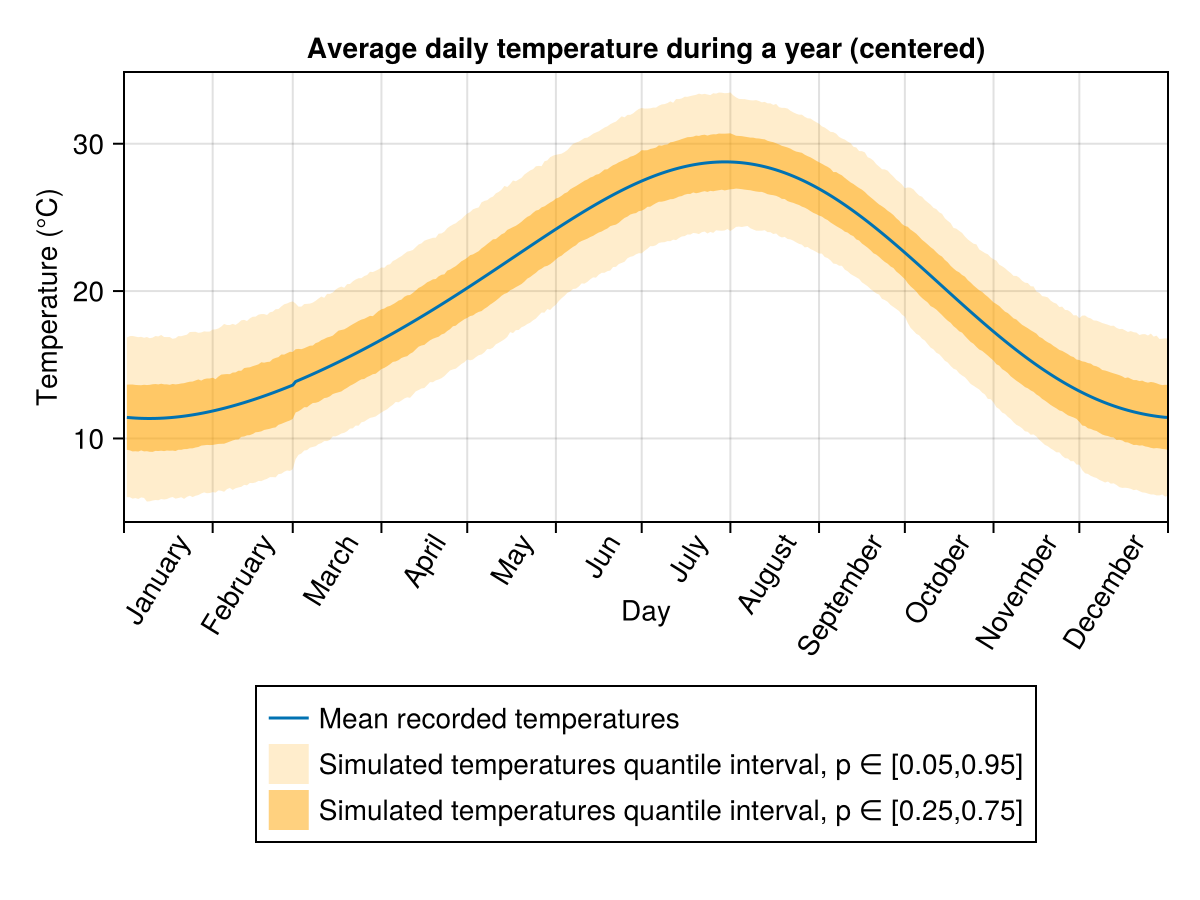

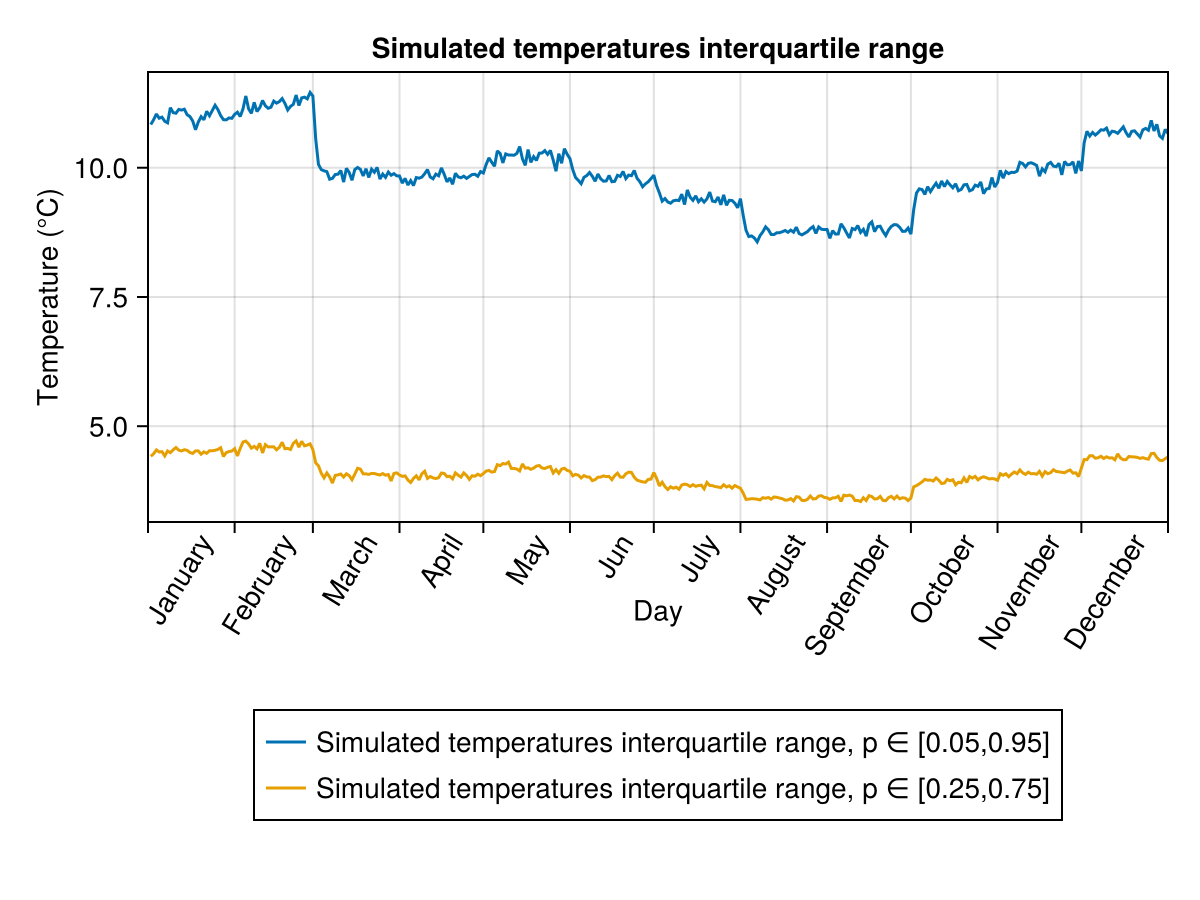

CairoMakie.Screen{IMAGE}


In [8]:
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"concat")
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

### With sum of likelihoods

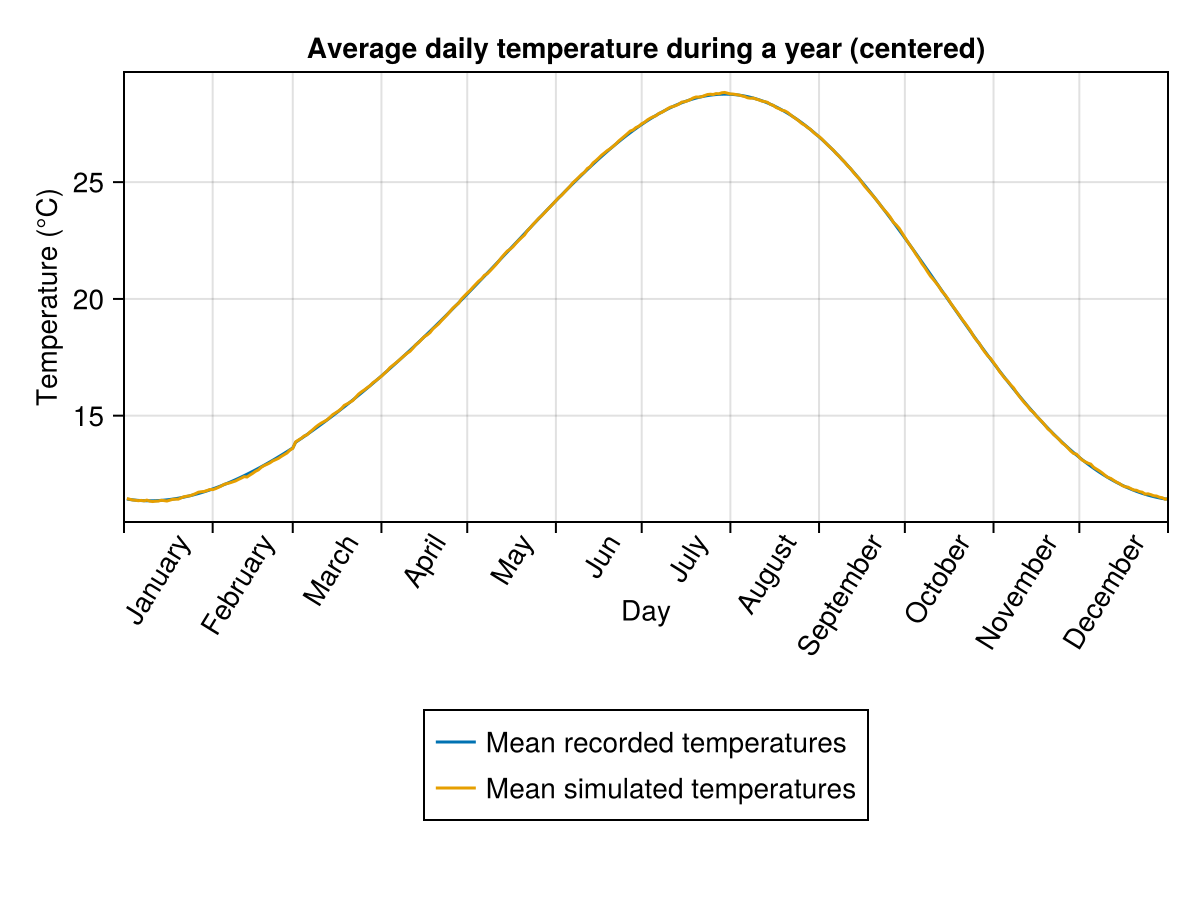

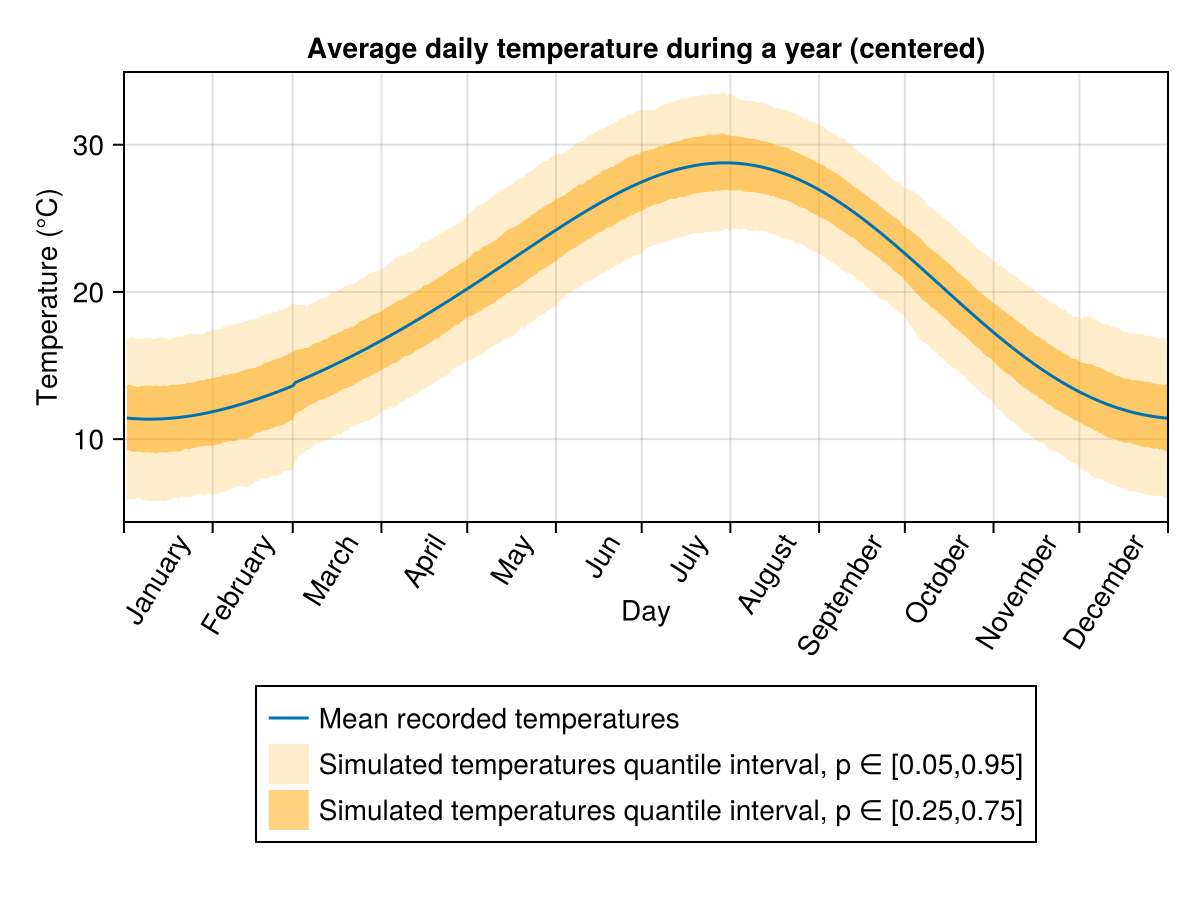

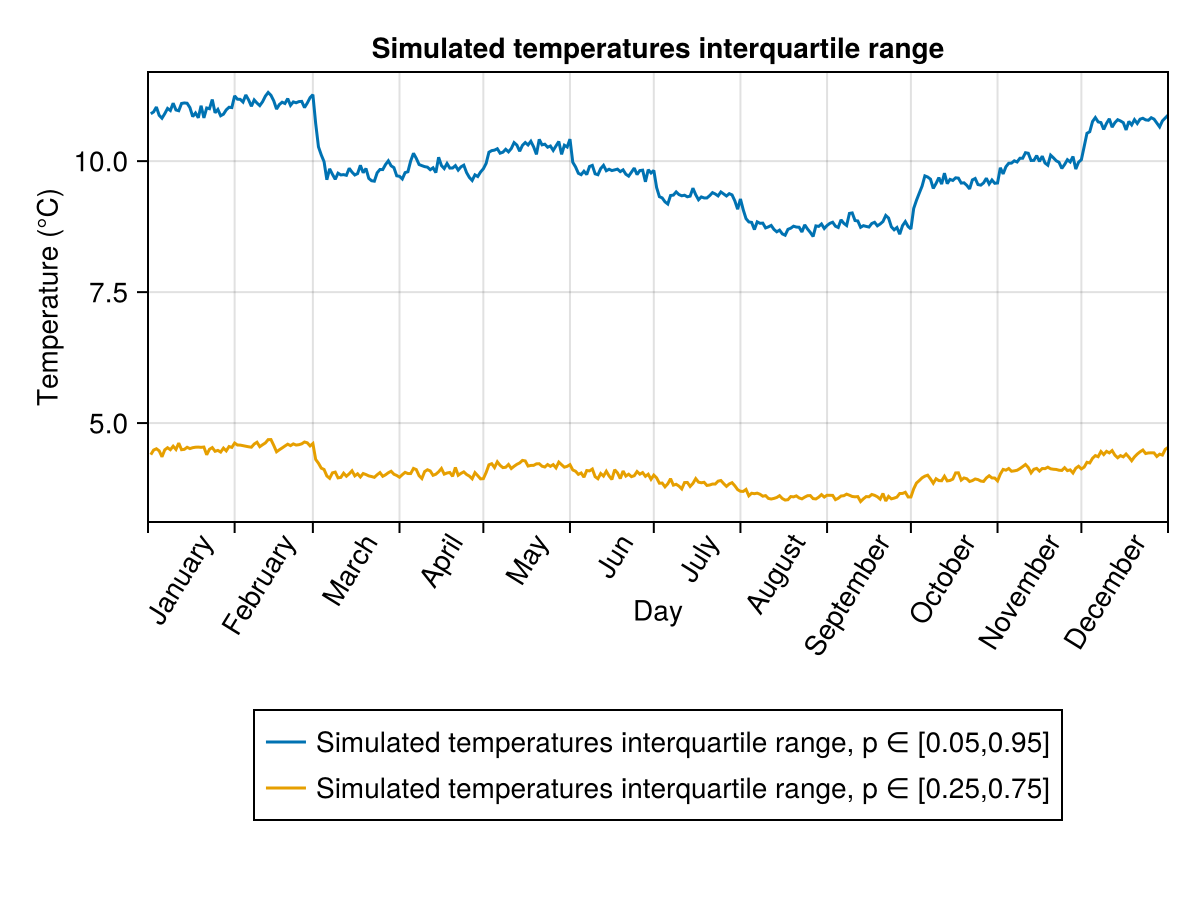

CairoMakie.Screen{IMAGE}


In [9]:
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"sumLL")
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

# Estimation AR(2)

## Estimation

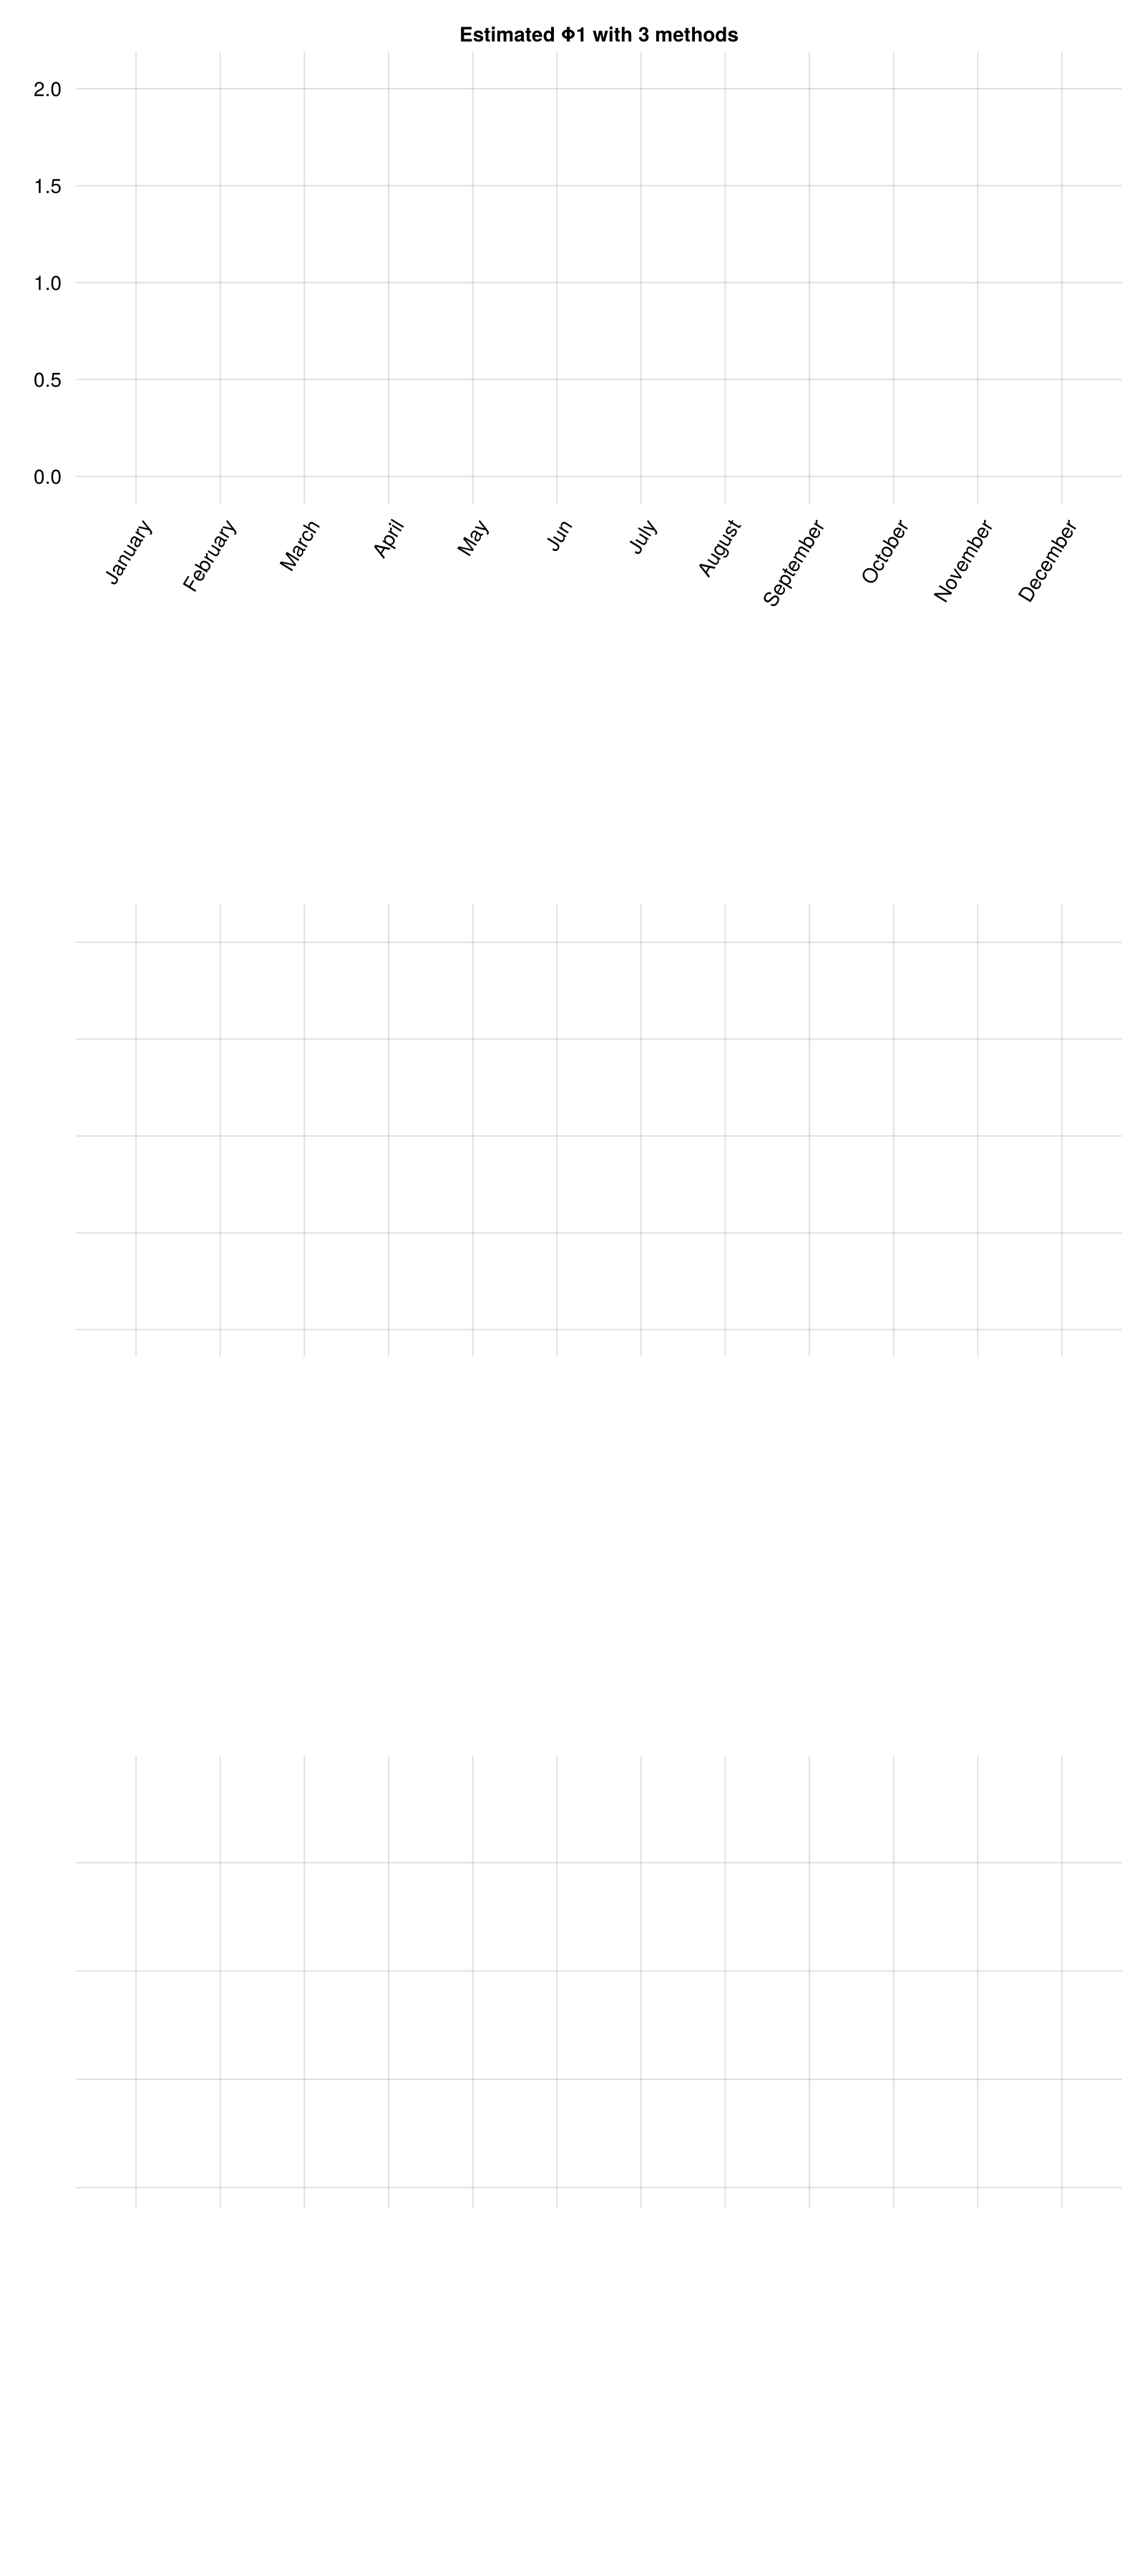

CairoMakie.Screen{IMAGE}


In [10]:
Params, figure= AllEstimation(Monthly_temp, 2, lineplot=true)
display(figure)